# <center>L2 Computational Physics</center>
---

## Gradient Descent

In this notebook, you shall illustrate the different behaviours of the gradient descent (GD) method when finding the minima of 
*Rosenbrock's Banana Function*,

$$f(x,y) \equiv (1-x)^{2} + 100(y-x^{2})^{2}~.$$

You will generate a plot demonstrating how the behaviour of the GD method changes with different values of the step-size parameter, $\eta$. To do this, you will plot example GD trajectories using three different $\eta$ values. 

In [1]:
import numpy
from matplotlib import pyplot as plt
import matplotlib.colors
from random import random

First, define the functions `f` and `grad` which implement the *banana* function and its **analytical** derivative. 
`r` is a two component array of coordinates.

In [2]:
def f(r):
    '''Function to be minimised'''
    x, y = r
    # YOUR CODE HERE
    return (1.-x) ** 2 + 100. * (y - x*x) ** 2
    
    
def grad(r):
    '''Calculate gradient of banana function at coordinates r = (x,y)'''
    x, y = r
    # YOUR CODE HERE
    xComp = -2.*(1-x) - 400.*x*(y-x*x)
    yComp = 200.*(y-x*x)
    return numpy.array([xComp, yComp])

Before proceeding, ensure that your functions have been written correctly:

In [3]:
# these tests are worth 2 marks 
r = numpy.array([1, 4])
assert numpy.isclose(f(r), 900)
assert numpy.isclose(grad(r), numpy.array([-1200,   600])).all()

Implement the function `gradientDescent`. It takes as argument:

- `df`: the derivative of the the function you want to minimize
- `r0`: an array of two initial values where the algorithm starts
- `eta`: the step size
- `nstep`: the number of steps

It should return the history of points visited, including the initial one.

In [4]:
def gradientDescent(df, r0, eta, nstep):
    x, y = r0
    history = numpy.empty( (nstep+1, 2) )
    # YOUR CODE HERE
    history[0] = r0
    for i in range(1, nstep+1):
        lastX = history[i-1]
        xi = lastX - eta * df(lastX)
        history[i] = xi
    return history


Test your answer:

In [5]:
# these tests are worth 3 marks 
gdtest = gradientDescent(grad, [0.3,0.4], 0.01, 2)
assert gdtest.shape == (3,2)
assert numpy.isclose(gdtest, numpy.array([
        [ 0.3       ,  0.4       ],
        [ 0.686     , -0.22      ],
        [-1.20271542,  1.161192  ]])).all()

## Plotting task

Create a plot to show the trajectory of the gradient descent optimisation algorithm for different values of $\eta$. Use the values of $\eta$ provided. Start all trajectories at $r_0=(0.2,1)$. [3 marks]

True minimum of function: (1,1)
Minimum found with step size 0.004: (0.5802530425059814, 0.39962827688898206)
Minimum found with step size 0.003: (0.7392766055621439, 0.5973844228651671)
Minimum found with step size 0.002: (1.000857527130231, 0.9976208674652485)


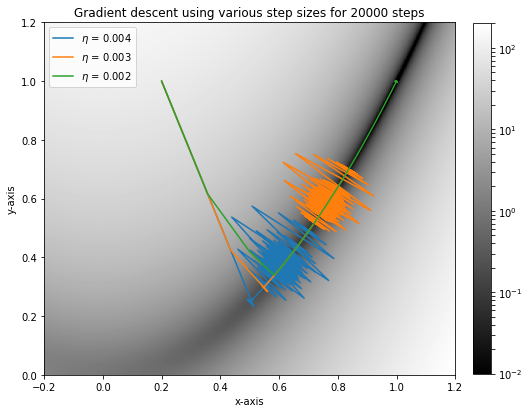

In [15]:
# Generate banana function
N = 1000 # Resolution of 2D image
x0 = -0.2
x1 = 1.2
y0 = 0
y1 = 1.2
xs = numpy.linspace(x0, x1, N)
ys = numpy.linspace(y0, y1, N)
dat = numpy.zeros((N, N))

for ix, x in enumerate(xs):
    for iy, y in enumerate(ys):
        r = [x,y]
        dat[iy, ix] = f(r)

plt.figure(figsize=(8,8))
im = plt.imshow(dat, extent=(x0, x1, y0, y1), origin='lower', cmap=matplotlib.cm.gray, 
                norm=matplotlib.colors.LogNorm(vmin=0.01, vmax=200))
plt.colorbar(im, orientation='vertical', fraction=0.03925, pad=0.04)

# Now generate the trajectories:
gammas = [0.004, 0.003, 0.002]  # Gammas to try out
r0 = numpy.array([0.2, 1])  # Initial seed point
noSteps = 20000
legend = []
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Gradient descent using various step sizes for {} steps'.format(noSteps))
print('True minimum of function: (1,1)')
for eta in gammas:
    trajectory = gradientDescent(grad, r0, eta, noSteps)
#     print(trajectory)
    xs = trajectory[:,0]
    ys = trajectory[:,1]
#     print(len(xs), len(ys))
    plt.plot(xs,ys)
    legend.append('$\eta$ = ' + str(eta))
    print('Minimum found with step size {}: ({}, {})'.format(eta, xs[-1],ys[-1]))

plt.legend(legend);

Which of the three step size $\eta$ is best? Use the box below to justify your answer. [2 marks]

$\eta = 0.002$ is the best step size out of the three different sizes as it reaches closer to the minimum than the other two which start oscillating far away from the minimum. Ideally, a better implementation of gradient descent should be used as it takes about 20,000 steps until the minimum is reached using $\eta = 0.002$